In [41]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('fake_users_data.csv', index_col=0)

In [43]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [44]:
def mapping(x):
    if x == 'gratis':
        return 1
    elif x == '1-50':
        return 2
    elif x == '+50':
        return 3
    else:
        return 9999

df['price'] = df['price'].apply(mapping)

In [45]:
df

,time,price,route_id,age_+45,age_0-18,age_18-35,age_35-45,gender_hombre,gender_mujer,gender_otro,...,type_patrimonio,type_turistica,diff_alta,diff_baja,comp_amigos,comp_familia,comp_pareja,comp_solo,trans_a pie,trans_bicicleta
0,1.5,1,No hay ruta,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,1.5,2,Trinitat - L'Almodí,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,1.5,3,Ruta València amb bicicleta,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,7.5,3,Ruta dels Pecats a l'entorn del Mercat Central,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,7.5,1,Torres de Quart - Temple,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,7.5,1,Arbres: La volta al món,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,1
29996,1.5,3,Glorieta-Santa Catalina,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
29997,5.5,3,Entre Naranjos,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
29998,3.5,2,Trinitat - L'Almodí,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


# DATA PREPARATION

In [46]:
X = df.drop(columns=['route_id'], axis=1)
y = df[['route_id']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

C:\Users\Paris\AppData\Local\Temp\ipykernel_4076\2477965460.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [49]:
y_pred_rf

array(["Trinitat - L'Almodí", "Trinitat - L'Almodí",
       "Trinitat - L'Almodí", ..., 'Arbres monumentals i singulars',
       "Trinitat - L'Almodí", 'Glorieta-Santa Catalina'], dtype=object)

In [50]:
accuracy_score(y_test, y_pred_rf)

0.6886666666666666

<AxesSubplot:>

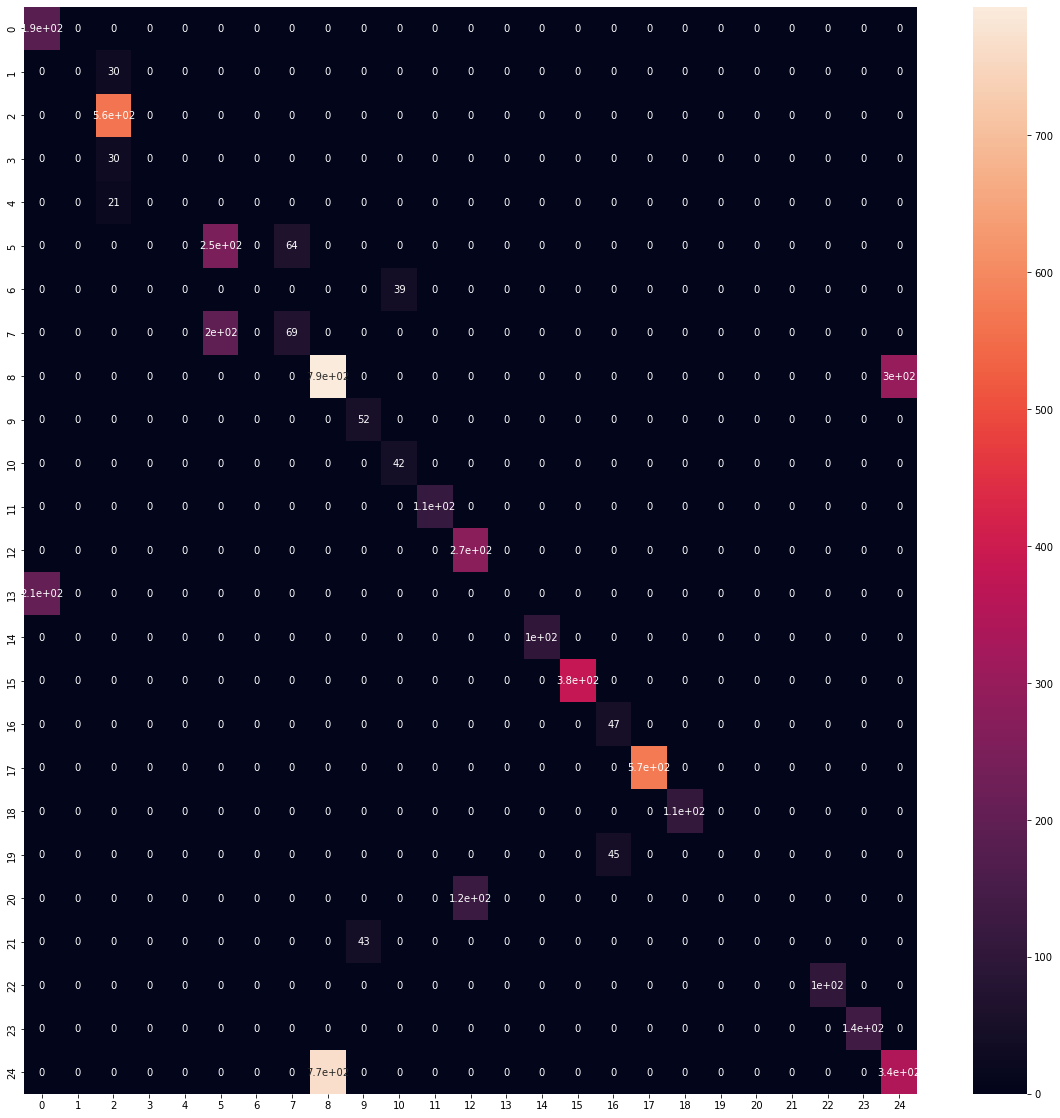

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

In [52]:
rnd_clf.feature_names_in_

array(['time', 'price', 'age_+45', 'age_0-18', 'age_18-35', 'age_35-45',
       'gender_hombre', 'gender_mujer', 'gender_otro', 'type_historica',
       'type_literaria', 'type_patrimonio', 'type_turistica', 'diff_alta',
       'diff_baja', 'comp_amigos', 'comp_familia', 'comp_pareja',
       'comp_solo', 'trans_a pie', 'trans_bicicleta'], dtype=object)

In [53]:
rnd_clf.feature_importances_

array([1.77595672e-02, 2.13153945e-04, 1.55960595e-02, 1.66100001e-02,
       1.79027774e-01, 1.77282477e-02, 4.68577928e-05, 3.99011362e-05,
       6.58037485e-05, 1.01358601e-01, 6.53901224e-02, 6.40334617e-02,
       8.89676148e-02, 1.80712675e-01, 1.87841075e-01, 8.79364724e-05,
       5.85188688e-05, 6.64414633e-05, 6.35455072e-05, 3.39779604e-02,
       3.03546824e-02])

In [54]:
# Guardar modelo
filename = 'finished_model.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(rnd_clf, archivo_salida)